## Phase-space decomposition via a machine-learned cubical complex 

First we import the functions that will be used.

In [1]:
from src.attractor_id.jupyter_functions import train_classifier, compute_homology, make_decomposition_plot, make_polytope_plot

### Code parameters

These are the parameters that can be changed before running the computation. The parameters set here override any parameters that are set in the configuration files.

The following systems are implemented:
- 'straight_separatrix'
- 'radial_2labels'
- 'radial_3labels'
- 'curved_separatrix'
- 'EMT'
- 'periodic'
- 'ellipsoidal_2d'
- 'DSGRN_2d_network'

In [2]:
system = 'DSGRN_2d_network'

N = 10 # number of nodes in the hidden layer of the network (must be an integer multiple of the dimension of the system)

labeling_threshold = 0.3 # list of thresholds in (0, 1/2) used to label cubes

epochs = 100 # number of times that the data is cycled through during neural network training

### Train neural network

We obtained a trained model, which is a cubical neural network with a hidden layer of width ```N```.

In [3]:
model_filename = 'model'
model = train_classifier(system, N, epochs, model_filename)

Epoch 1/100
Test loss: 0.861200
Train loss: 0.830000
Epoch 2/100
Test loss: 0.861200
Train loss: 0.809000
Epoch 3/100
Test loss: 0.861200
Train loss: 0.814000
Epoch 4/100
Test loss: 0.861200
Train loss: 0.837000
Epoch 5/100
Test loss: 0.861200
Train loss: 0.913000
Epoch 6/100
Test loss: 0.861200
Train loss: 0.897000
Epoch 7/100
Test loss: 0.861200
Train loss: 0.833000
Epoch 8/100
Test loss: 0.861200
Train loss: 0.855000
Epoch 9/100
Test loss: 0.861200
Train loss: 0.891000
Epoch 10/100
Test loss: 0.861200
Train loss: 0.817000
Epoch 11/100
Test loss: 0.861200
Train loss: 0.818000
Epoch 12/100
Test loss: 0.861200
Train loss: 0.892000
Epoch 13/100
Test loss: 0.861200
Train loss: 0.849000
Epoch 14/100
Test loss: 0.861200
Train loss: 0.876000
Epoch 15/100
Test loss: 0.861200
Train loss: 0.848000
Epoch 16/100
Test loss: 0.861200
Train loss: 0.810000
Epoch 17/100
Test loss: 0.861200
Train loss: 0.837000
Epoch 18/100
Test loss: 0.861200
Train loss: 0.805000
Epoch 19/100
Test loss: 0.861200
Trai

### Compute homology of labeled regions of the phase space decomposition obtained from the neural network

We compute the homology of each of the labeled regions according to the decomposition determined by the trained model. The output is the Betti numbers.

If the region is empty, this is specified.

We also compute the number of labeled cubes.

In [4]:
hyperplane_list, cube_list = compute_homology(system, labeling_threshold, N, model)

ValueError: too many values to unpack (expected 3)

### Produce figure of phase space decomposition

The decomposition overlays the testing data colored according to the value of the network on that data.

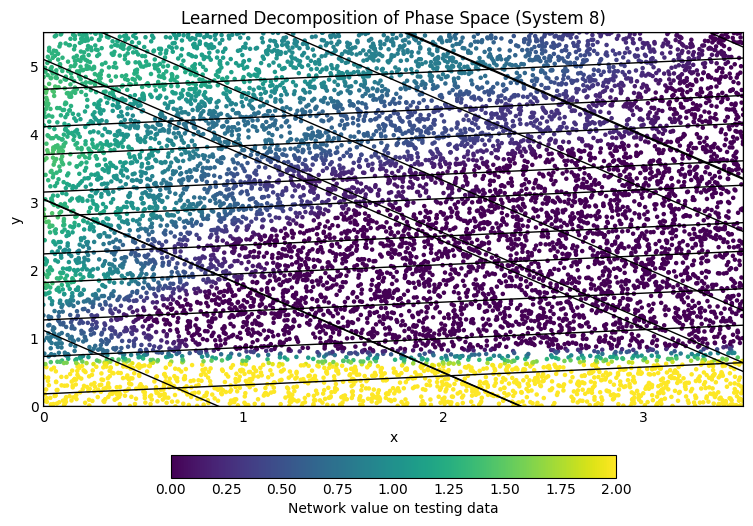

In [ ]:
file_name = 'decomposition_plot'
make_decomposition_plot(system, hyperplane_list, model, file_name)

In [ ]:
file_name = 'polytope_plot'
make_polytope_plot(system, cube_list, file_name)

### Changing further code parameters

Further parameters such as learning rate can be changed for each system in the configuration files in the folder ```config```. 

The following sentence if false at the moment. This computation used the data available at https://github.com/begelb/attractor-id-data. To use a local copy of data, change the parameter ```using_local_data``` to ```True``` and change the paths following ```train_data_file``` and ```test_data_file``` in the configuration file to the appropriate paths.